In [54]:
### import libraries
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import style
import seaborn as sns   
sns.set_style('darkgrid')


from scipy import stats
from scipy.stats import chi2_contingency 

import statsmodels.api as sm
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings("ignore")

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
service311=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/noise_data_clean.csv')

In [57]:
service311.head()

,Unnamed: 0,Unnamed: 0.1,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Descriptor,Complaint_Type,Resolution_Description,Resolution_Action_UpdatedDate,zipcode,Borough,Latitude,Longitude,Location,Processing_Time
0,0,0,52494258,2021-11-12 23:32:03,2021-11-13 00:01:47,NYPD,New York City Police Department,Loud Music/Party,Noise - Street/Sidewalk,The Police Department responded to the complai...,11/13/2021 12:01:53 AM,10009,MANHATTAN,40.728098,-73.980986,"(40.72809840521916, -73.98098598390919)",0 days 00:29:44
1,1,1,52494267,2021-11-12 22:51:56,2021-11-13 02:07:21,NYPD,New York City Police Department,Loud Music/Party,Noise - Residential,The Police Department responded to the complai...,11/13/2021 02:07:28 AM,11385,QUEENS,40.703420,-73.910624,"(40.70342006960225, -73.91062391218271)",0 days 03:15:25
2,2,2,52494269,2021-11-12 21:52:21,2021-11-12 22:46:15,NYPD,New York City Police Department,Loud Music/Party,Noise - Street/Sidewalk,The Police Department responded to the complai...,11/12/2021 10:46:20 PM,10012,MANHATTAN,40.727491,-74.002594,"(40.727490610002285, -74.00259410868611)",0 days 00:53:54
3,3,3,52762434,2021-12-10 23:07:33,2021-12-10 23:16:17,NYPD,New York City Police Department,Banging/Pounding,Noise - Residential,The Police Department reviewed your complaint ...,12/10/2021 11:16:21 PM,10456,BRONX,40.838195,-73.911184,"(40.83819547525466, -73.91118371113687)",0 days 00:08:44
4,4,4,52762435,2021-12-10 10:33:53,2021-12-10 12:20:28,NYPD,New York City Police Department,Banging/Pounding,Noise - Residential,The Police Department responded to the complai...,12/10/2021 12:20:34 PM,11228,BROOKLYN,40.625777,-74.010364,"(40.62577708307177, -74.01036422375117)",0 days 01:46:35


In [60]:
service311["Closed_Date"]=pd.to_datetime(service311["Closed_Date"])

In [61]:
service311["Created_Date"]=pd.to_datetime(service311["Created_Date"])

In [62]:
service311["Created_Date_year"]=service311["Created_Date"].dt.year

In [63]:
# Creating the Request closing time column 
service311["Request_Closing_Time"]=(service311["Closed_Date"]-service311["Created_Date"])

# Converting it to minutes
Request_Closing_Time=[]
for x in (service311["Closed_Date"]-service311["Created_Date"]):
    close=x.total_seconds()/60
    Request_Closing_Time.append(close)
    
service311["Request_Closing_Time"]=Request_Closing_Time

In [64]:
service311["Request_Closing_Time"]

0           29.733333
1          195.416667
2           53.900000
3            8.733333
4          106.583333
              ...    
1980230     46.466667
1980231     22.666667
1980232      0.750000
1980233      3.583333
1980234     42.300000
Name: Request_Closing_Time, Length: 1980235, dtype: float64

In [40]:
#noise_complaints_data.loc(noise_complaints_data['Complaint_Type']== 'Noise', 'Complaint_Type')='Noise-unspecified'
service311['Complaint_Type'] =service311['Complaint_Type'].replace('Noise', 'Noise-Unspecified')

## complaint type

In [41]:
majorcompliants=service311.dropna(subset=["Complaint_Type"])
majorcomplaints=service311.groupby("Complaint_Type").size()
majorcomplaints = majorcomplaints.sort_values(ascending = False).to_frame('count').reset_index()

majorcomplaints

,Complaint_Type,count
0,Noise - Residential,974898
1,Noise - Street/Sidewalk,484061
2,Noise - Vehicle,204241
3,Noise-Unspecified,140630
4,Noise - Commercial,137783
5,Noise - Park,20200
6,Noise - Helicopter,14741
7,Noise - House of Worship,3566
8,Collection Truck Noise,115


## Count plot to understand the type of the complaint raised

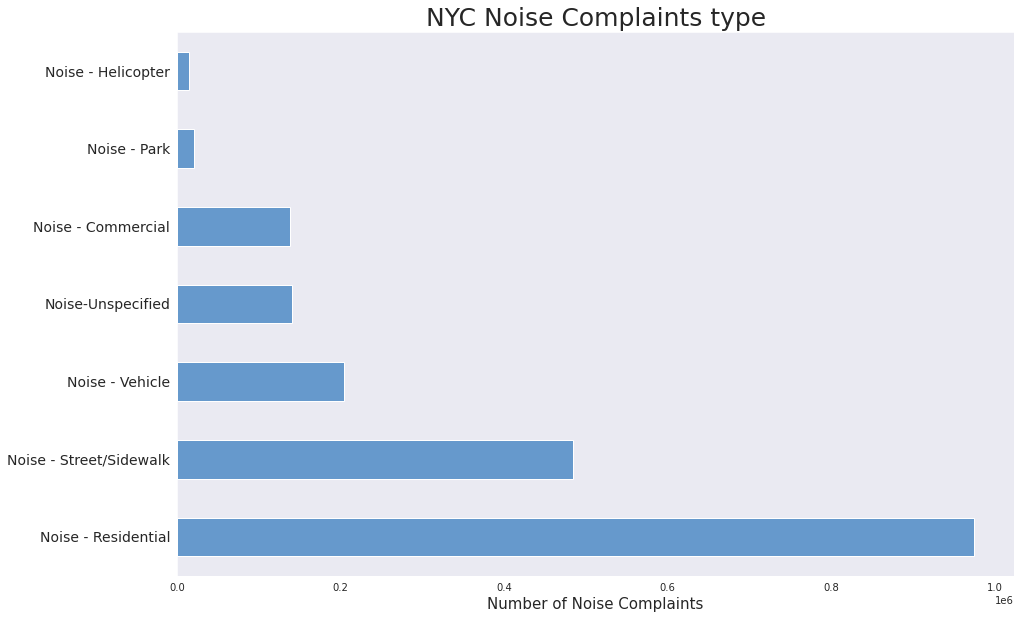

In [42]:
service311['Complaint_Type'].value_counts()[:7].plot(kind='barh',figsize=(15,10),color='#6699CC',grid=False)
plt.xlabel("Number of Noise Complaints", fontsize=15)
plt.yticks(fontsize=14)
plt.title('NYC Noise Complaints type',fontsize=25)
plt.savefig('./Fig1 noise complaint1',dpi=500,bbox_inches = 'tight',transparent = True)

plt.show()

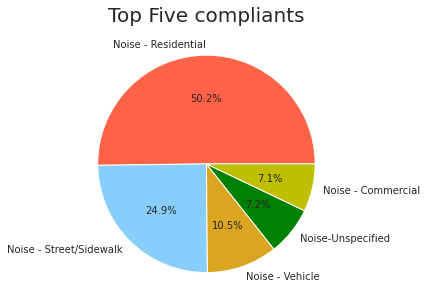

In [43]:
# looking at the Top 5 compliants 
sortedComplaintType = majorcomplaints.head()
plt.figure(figsize=(5,5))
plt.title('Top Five compliants',fontsize=20)

plt.pie(sortedComplaintType['count'],labels=sortedComplaintType["Complaint_Type"], autopct="%1.1f%%",
       colors = ['tomato','lightskyblue','goldenrod','green','y'])
#plt.legend(loc='upper right',fontsize=10)
plt.savefig('./Fig1 noise complaint2',dpi=500,bbox_inches = 'tight',transparent = True)
plt.show()

## More detailed complaint type

In [65]:
df_Descriptor=service311.groupby([service311['Created_Date_year'],service311['Descriptor']]).count()

In [66]:
df_Descriptor = df_Descriptor.reset_index()

In [67]:
df_Descriptor = df_Descriptor.rename(columns={'Unnamed: 0':'Number'})

In [68]:
df_Descriptor

,Created_Date_year,Descriptor,Number,Unnamed: 0.1,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Resolution_Description,Resolution_Action_UpdatedDate,zipcode,Borough,Latitude,Longitude,Location,Processing_Time,Request_Closing_Time
0,2019,21 Collection Truck Noise,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112
1,2019,Banging/Pounding,70185,70185,70185,70185,70185,70185,70185,70185,70185,70185,70185,70185,70185,70185,70185,70185,70185
2,2019,Car/Truck Horn,13602,13602,13602,13602,13602,13602,13602,13602,13602,13602,13602,13602,13602,13602,13602,13602,13602
3,2019,Car/Truck Music,21932,21932,21932,21932,21932,21932,21932,21932,21932,21932,21932,21932,21932,21932,21932,21932,21932
4,2019,Engine Idling,8045,8045,8045,8045,8045,8045,8045,8045,8045,8045,8045,8045,8045,8045,8045,8045,8045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2021,Noise: Other Noise Sources (Use Comments) (NZZ),5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
74,2021,Noise: Private Carting Noise (NQ1),843,843,843,843,843,843,843,843,843,843,843,843,843,843,843,843,843
75,2021,Noise: Vehicle (NR2),2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
76,2021,Noise: air condition/ventilation equipment (NV1),4754,4754,4754,4754,4754,4754,4754,4754,4754,4754,4754,4754,4754,4754,4754,4754,4754


In [69]:
df_Descriptor = df_Descriptor.sort_values('Number',ascending=False)

In [70]:
df_Descriptor[['Created_Date_year','Descriptor','Number']][0:30]

,Created_Date_year,Descriptor,Number
31,2020,Loud Music/Party,485326
58,2021,Loud Music/Party,459753
5,2019,Loud Music/Party,255170
27,2020,Banging/Pounding,91598
54,2021,Banging/Pounding,91128
1,2019,Banging/Pounding,70185
56,2021,Car/Truck Music,57034
29,2020,Car/Truck Music,55118
32,2020,Loud Talking,52392
59,2021,Loud Talking,50719


In [71]:
#select common complaints type
df_Descriptor_select = df_Descriptor.query('Descriptor=="Loud Music/Party" | Descriptor=="Banging/Pounding" | Descriptor=="Car/Truck Music" | Descriptor=="Loud Talking"')

In [72]:
df_Descriptor_select = df_Descriptor_select.sort_values(['Created_Date_year','Number'],ascending=True)

In [73]:
type(df_Descriptor_select['Created_Date_year'])

pandas.core.series.Series

In [74]:
df_Descriptor_select['Created_Date_year']=df_Descriptor_select['Created_Date_year'].astype(str)

In [75]:
df_Descriptor_select.head()

,Created_Date_year,Descriptor,Number,Unnamed: 0.1,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Resolution_Description,Resolution_Action_UpdatedDate,zipcode,Borough,Latitude,Longitude,Location,Processing_Time,Request_Closing_Time
3,2019,Car/Truck Music,21932,21932,21932,21932,21932,21932,21932,21932,21932,21932,21932,21932,21932,21932,21932,21932,21932
6,2019,Loud Talking,39064,39064,39064,39064,39064,39064,39064,39064,39064,39064,39064,39064,39064,39064,39064,39064,39064
1,2019,Banging/Pounding,70185,70185,70185,70185,70185,70185,70185,70185,70185,70185,70185,70185,70185,70185,70185,70185,70185
5,2019,Loud Music/Party,255170,255170,255170,255170,255170,255170,255170,255170,255170,255170,255170,255170,255170,255170,255170,255170,255170
32,2020,Loud Talking,52392,52392,52392,52392,52392,52392,52392,52392,52392,52392,52392,52392,52392,52392,52392,52392,52392


In [76]:
import plotly.express as px

complaint_type_fig = px.bar(df_Descriptor_select, x="Descriptor", y="Number", 
                             height=700, facet_col='Created_Date_year', color = "Created_Date_year")


#plt.text(x,y,y, ha='center', va='bottom')

#complaint_type_fig = px.bar(df_Descriptor_select, x="Descriptor", y="Number", 
 #            orientation='h',barmode='group',
  #           height=700, color = "Created_Date_year")
             #color_discrete_sequence = px.colors.sequential.thermal)    
    
complaint_type_fig.update_layout(barmode='relative')
complaint_type_fig.update_layout(barmode='relative',
                                 xaxis={'categoryorder':'total descending'},
                  title="The Most Frequent 311 Complaint Type",
                  font=dict(family="silom",
                  size=14, color="#58508d")

#plt.savefig('./Fig2 noise type1',dpi=500,bbox_inches = 'tight',transparent = True)

complaint_type_fig.show()

SyntaxError: ignored

## Borough

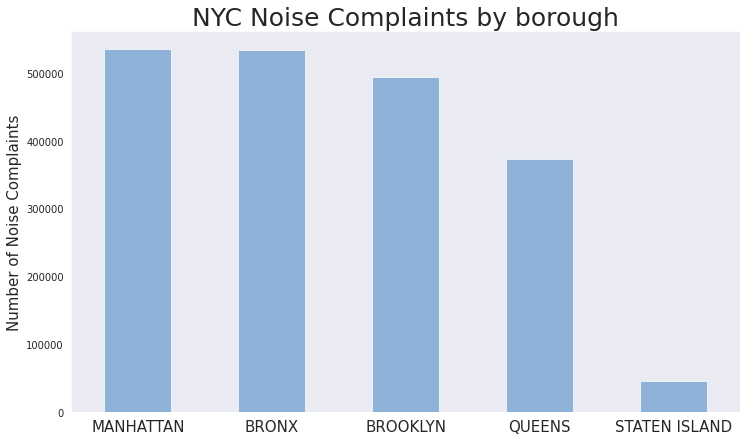

In [25]:
#Count Plot for Borough with the highest complaints
plt.figure(figsize=(12,7))
service311['Borough'].value_counts().plot(kind='bar',alpha=0.7,color='#6699CC',grid=False)
plt.ylabel("Number of Noise Complaints", fontsize=15)
#plt.xlabel("Borough", fontsize=15)
plt.title('NYC Noise Complaints by borough',fontsize=25)
plt.xticks(fontsize=15, rotation = 0)
plt.savefig('./Fig3 borough1',dpi=500,bbox_inches = 'tight',transparent = True)
plt.show()

In [26]:
# looking at the Borough


borough=service311.groupby("Borough").size()
borough = borough.sort_values(ascending = False).to_frame('count').reset_index()

borough

,Borough,count
0,MANHATTAN,534709
1,BRONX,534040
2,BROOKLYN,493544
3,QUEENS,372834
4,STATEN ISLAND,45108


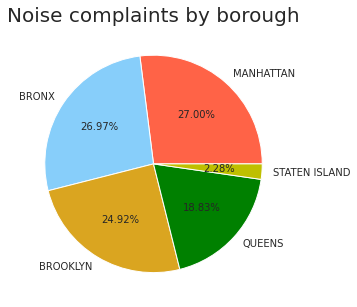

In [27]:
# looking at the Borough
plt.figure(figsize=(5,5))
plt.title('Noise complaints by borough',fontsize=20)

#plt.legend(loc='upper right',fontsize=10)

plt.pie(borough['count'],labels=borough["Borough"], autopct="%1.2f%%",
        colors = ['tomato','lightskyblue','goldenrod','green','y'])
plt.savefig('./Fig3 borough2',dpi=500,bbox_inches = 'tight',transparent = True)
plt.show()

In [28]:
#Percentage of cases in each Borough
for x in service311["Borough"].unique():
    print("Percentage of Request from ",x," Division : ",round((service311["Borough"]==x).sum()/len(service311)*100,2))

Percentage of Request from  MANHATTAN  Division :  27.0
Percentage of Request from  QUEENS  Division :  18.83
Percentage of Request from  BRONX  Division :  26.97
Percentage of Request from  BROOKLYN  Division :  24.92
Percentage of Request from  STATEN ISLAND  Division :  2.28


## wordcloud

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import string
import nltk
nltk.download('omw-1.4')
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.collocations import *
from nltk import FreqDist
from nltk.probability import FreqDist
from os import path
from PIL import Image
import matplotlib.pyplot as plt
import os
from wordcloud import WordCloud, STOPWORDS

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

def clean_words(text):
    
    """Takes in a string or iterable of strings, and returns a cleaned list 
       of words in the text that was passed in."""
    
    #join all strings in text and separate them by white space
    joined_text = " ".join(text) 
    
    #remove all characters that are not letters
    joined_text = re.sub('[^A-Za-z ]+', ' ', joined_text)
    
    #convert all words in list to their base form, or 'lemma'
    words = [WordNetLemmatizer().lemmatize(word) for word in joined_text]
    
    #create a list of individual strings for each word in the text 
    words = word_tokenize(joined_text)
    
    
    clean_words_list = []
    
    for word in words:
        
        #exclude words that don't contribute to the meaning of the text
        stopwords_list = stopwords.words('english')
        for w in ['http', 'com', 'amp', 'www']:
            stopwords_list.append(w)
        
        if len(word) > 2 and word not in stopwords_list:
            
            #populate clean words list with remaining words
            clean_words_list.append(word.lower())
    
    return clean_words_list

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
df_sample = service311.sample(n=100000,axis=0)

In [31]:
clean_descriptor = clean_words(df_sample.Descriptor)

In [35]:
#generate the wordcloud for descriptor
wc = WordCloud(background_color="white", max_words=100,
               max_font_size =50, collocations=False,
               contour_width=2, contour_color='#51788c',repeat=True)

clean_string = '.'.join(clean_descriptor)
wc.generate(clean_string)

f = plt.figure(figsize=(8,12),dpi=3000)
plt.axis("off")
plt.imshow(wc, interpolation='bilinear')

font_dict = {'fontsize': 30, 'color': '#58508d', 'weight': 'bold'}

plt.title('Word Cloud', fontdict=font_dict)
plt.axis("off")
plt.savefig('./Fig4 wordcloud',dpi=500,bbox_inches = 'tight',transparent = True)

plt.show()